In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [55]:
columns=[
    'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
    'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
    'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
    'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
    'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
    'dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'
]


In [56]:
# Load dataset
data = pd.read_csv('../data/KDDTrain+.csv', names=columns)

In [57]:
print(data.head())

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2             

In [58]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [59]:
print(data.describe(include='all'))

            duration protocol_type service    flag     src_bytes  \
count   125973.00000        125973  125973  125973  1.259730e+05   
unique           NaN             3      70      11           NaN   
top              NaN           tcp    http      SF           NaN   
freq             NaN        102689   40338   74945           NaN   
mean       287.14465           NaN     NaN     NaN  4.556674e+04   
std       2604.51531           NaN     NaN     NaN  5.870331e+06   
min          0.00000           NaN     NaN     NaN  0.000000e+00   
25%          0.00000           NaN     NaN     NaN  0.000000e+00   
50%          0.00000           NaN     NaN     NaN  4.400000e+01   
75%          0.00000           NaN     NaN     NaN  2.760000e+02   
max      42908.00000           NaN     NaN     NaN  1.379964e+09   

           dst_bytes           land  wrong_fragment         urgent  \
count   1.259730e+05  125973.000000   125973.000000  125973.000000   
unique           NaN            NaN        

In [60]:
num_rows = data.shape[0]
unique_labels = data['outcome'].nunique()
top_5_attacks = data['outcome'].value_counts().head(5)
print(f"\nTotal rows: {num_rows}, Unique attack types: {unique_labels}")
print("Top 5 attack types:\n", top_5_attacks)


Total rows: 125973, Unique attack types: 23
Top 5 attack types:
 outcome
normal       67343
neptune      41214
satan         3633
ipsweep       3599
portsweep     2931
Name: count, dtype: int64


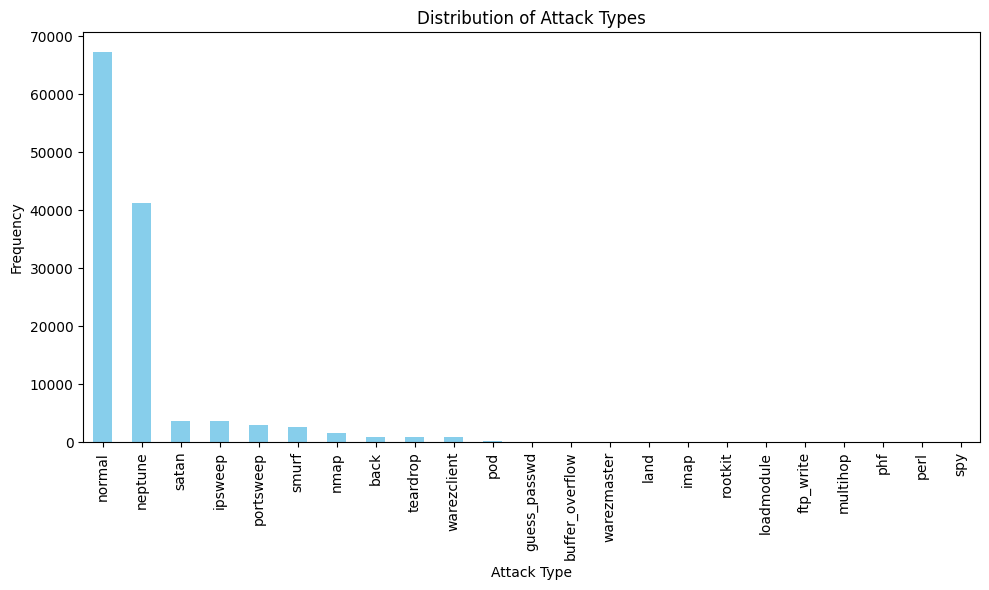

In [61]:
plt.figure(figsize=(10, 6))
data['outcome'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Attack Types")
plt.xlabel("Attack Type")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [62]:
# Identify types
categorical = ['protocol_type', 'service', 'flag']
binary = ['land', 'logged_in', 'is_host_login', 'is_guest_login', 'root_shell', 'su_attempted']
numerical = [col for col in columns if col not in (categorical + binary + ['outcome', 'level'])]
print("Categorical features:", categorical)
print("Binary features:", binary)
print("Numerical features:", numerical)

Categorical features: ['protocol_type', 'service', 'flag']
Binary features: ['land', 'logged_in', 'is_host_login', 'is_guest_login', 'root_shell', 'su_attempted']
Numerical features: ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [63]:
# Check for missing values and duplicates
print("\nMissing values per column:\n", data.isnull().sum())
print("\nNumber of duplicate rows:", data.duplicated().sum())


Missing values per column:
 duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate 

In [64]:
# There are no missing values and duplicates in this dataset
# If there were missing values, we could handle them as follows:
data=data.fillna(0)
data=data.drop_duplicates()

In [65]:
data=pd.get_dummies(data, columns=categorical)
print("\nData after one-hot encoding:\n", data.head())


Data after one-hot encoding:
    duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        491          0     0               0       0    0   
1         0        146          0     0               0       0    0   
2         0          0          0     0               0       0    0   
3         0        232       8153     0               0       0    0   
4         0        199        420     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  ...  flag_REJ  flag_RSTO  \
0                  0          0                0  ...     False      False   
1                  0          0                0  ...     False      False   
2                  0          0                0  ...     False      False   
3                  0          1                0  ...     False      False   
4                  0          1                0  ...     False      False   

   flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  flag

In [70]:
encoded_columns = [col for col in data.columns if col.startswith('protocol_type_') 
                   or col.startswith('service_') 
                   or col.startswith('flag_')]

print("Encoded columns:")
print(data[encoded_columns].head())

Encoded columns:
   protocol_type_icmp  protocol_type_tcp  protocol_type_udp  service_IRC  \
0               False               True              False        False   
1               False              False               True        False   
2               False               True              False        False   
3               False               True              False        False   
4               False               True              False        False   

   service_X11  service_Z39_50  service_aol  service_auth  service_bgp  \
0        False           False        False         False        False   
1        False           False        False         False        False   
2        False           False        False         False        False   
3        False           False        False         False        False   
4        False           False        False         False        False   

   service_courier  ...  flag_REJ  flag_RSTO  flag_RSTOS0  flag_RSTR  flag_S0  \


In [71]:
scaler=MinMaxScaler()
data[numerical]=scaler.fit_transform(data[numerical])
numerical_data=data[numerical].head()
print("Data after normalization:\n", numerical_data)

Data after normalization:
    duration     src_bytes     dst_bytes  wrong_fragment  urgent  hot  \
0       0.0  3.558064e-07  0.000000e+00             0.0     0.0  0.0   
1       0.0  1.057999e-07  0.000000e+00             0.0     0.0  0.0   
2       0.0  0.000000e+00  0.000000e+00             0.0     0.0  0.0   
3       0.0  1.681203e-07  6.223962e-06             0.0     0.0  0.0   
4       0.0  1.442067e-07  3.206260e-07             0.0     0.0  0.0   

   num_failed_logins  num_compromised  num_root  num_file_creations  ...  \
0                0.0              0.0       0.0                 0.0  ...   
1                0.0              0.0       0.0                 0.0  ...   
2                0.0              0.0       0.0                 0.0  ...   
3                0.0              0.0       0.0                 0.0  ...   
4                0.0              0.0       0.0                 0.0  ...   

   dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  \
0        0.588235 